In [1]:
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

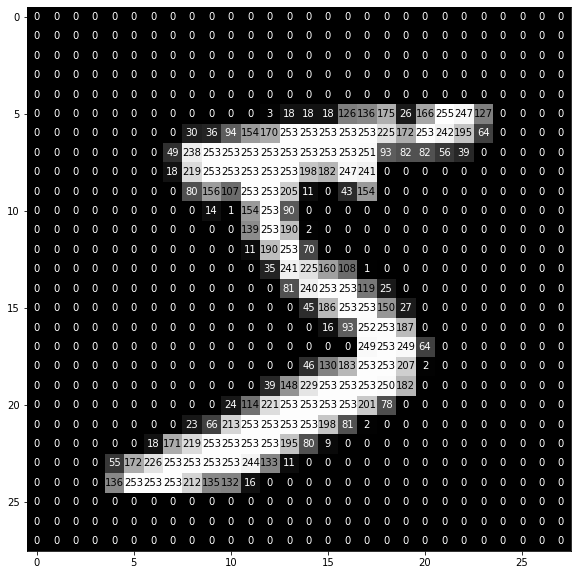

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0],ax )
plt.show()

In [7]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


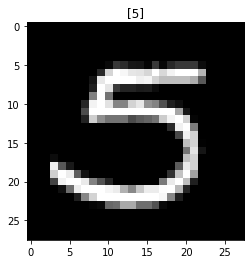

In [8]:
# lets see some random images and its labels
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [9]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [10]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [11]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255


In [12]:
# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [13]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28),)) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2319 - accuracy: 0.9321 - val_loss: 0.1228 - val_accuracy: 0.9649
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9716 - val_loss: 0.1006 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0617 - accuracy: 0.9812 - val_loss: 0.0914 - val_accuracy: 0.9747
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0856 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0889 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0896 - val_accuracy: 0.9763
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0189 - accuracy: 0.9942 - val_loss: 0.0884 - val_accuracy:

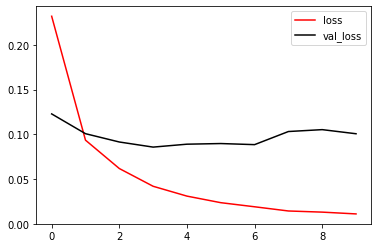

In [16]:
import matplotlib.pyplot as plt
plt.plot((history.history['loss']),color='red',label='loss')
plt.plot((history.history['val_loss']),color='black',label='val_loss')
plt.legend()
plt.show()

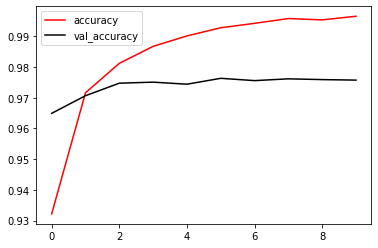

In [17]:
plt.plot(history.history['accuracy'],label='accuracy',color='red')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='black')
plt.legend()
plt.show()

In [18]:
# Evaluate on test data

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
from keras.preprocessing import image

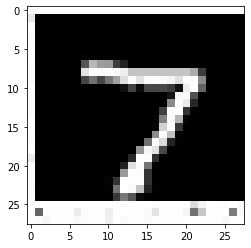

In [20]:
img = image.load_img(path="/content/7.jpg", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [21]:
prediction

7

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [23]:
accuracy_score(y_pred,y_test)

0.9767

In [24]:
confusion_matrix(y_pred,y_test)

array([[ 975,    0,    7,    2,    2,    2,    8,    1,    6,    6],
       [   1, 1129,    2,    0,    0,    0,    2,    5,    0,    4],
       [   0,    2,  999,    3,    3,    0,    0,    4,    2,    0],
       [   0,    0,    2,  990,    0,   10,    1,    2,    6,   13],
       [   0,    0,    4,    0,  959,    0,    2,    1,    2,   10],
       [   0,    0,    0,    3,    0,  869,    3,    0,    1,    5],
       [   2,    1,    2,    0,    4,    4,  942,    0,    1,    0],
       [   0,    1,    7,    6,    4,    1,    0, 1005,    2,   16],
       [   2,    2,    9,    5,    1,    5,    0,    7,  950,    6],
       [   0,    0,    0,    1,    9,    1,    0,    3,    4,  949]])

In [25]:
model.save("mnist.hdf5")